In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Membaca dataset
data_nilai = pd.read_csv('dataset/Data Nilai Mata Kuliah Alumni Prodi Informatika Universitas Gunadarma_Ver3 - NilaiVer3.csv')
data_profesi = pd.read_csv('dataset/Data Profil Alumni Prodi Informatika Universitas Gunadarma_Ver3 - ProfesiVer3.csv')

In [3]:
data_nilai.head(10)

,ID,NAMA MK,JENIS,SKS,NILAI
0,Alumni001,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
1,Alumni001,ALGORITMA DAN PEMROGRAMAN 2,U,2,B
2,Alumni001,ALGORITMA DAN PEMROGRAMAN 3,U,2,A
3,Alumni001,ALGORITMA DAN PENGOLAHAN PARALEL,W,3,B
4,Alumni001,ALGORITMA DEEP LEARNING,W,2,A
5,Alumni001,ARSITEKTUR KOMPUTER,U,2,A
6,Alumni001,BAHASA INDONESIA,W,2,B
7,Alumni001,BAHASA INGGRIS 1,W,1,A
8,Alumni001,BAHASA INGGRIS 2,W,1,B
9,Alumni001,BAHASA INGGRIS BISNIS 1,W,1,A


In [4]:
data_profesi.head(10)

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN
0,Alumni001,3.61,2020,System Analyst
1,Alumni002,3.55,2020,Software Quality Assurance Engineer
2,Alumni003,3.30,2020,Software Engineer
3,Alumni004,3.10,2020,Data Engineer
4,Alumni005,3.26,2020,Software Engineer
5,Alumni006,3.29,2020,IT Project Manager
6,Alumni007,3.25,2020,Data Analyst
7,Alumni008,3.36,2020,Network Engineer
8,Alumni009,3.67,2020,Software Quality Assurance Engineer
9,Alumni010,3.87,2020,Graphic Designer


In [5]:
# Remove the columns 'SKS' and 'JENIS' from dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['SKS', 'JENIS'])

In [6]:
# Merge the two datasets based on 'ID' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi, nilai_alumni_cleaned, on='ID')

In [7]:
# To see the count of each grade
grade_counts = merged_data['NILAI'].value_counts()
grade_counts

NILAI
A    22311
B    14670
C     1623
D      110
Name: count, dtype: int64

In [8]:
merged_data.head(10)

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN,NAMA MK,NILAI
0,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 1,A
1,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 2,B
2,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 3,A
3,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PENGOLAHAN PARALEL,B
4,Alumni001,3.61,2020,System Analyst,ALGORITMA DEEP LEARNING,A
5,Alumni001,3.61,2020,System Analyst,ARSITEKTUR KOMPUTER,A
6,Alumni001,3.61,2020,System Analyst,BAHASA INDONESIA,B
7,Alumni001,3.61,2020,System Analyst,BAHASA INGGRIS 1,A
8,Alumni001,3.61,2020,System Analyst,BAHASA INGGRIS 2,B
9,Alumni001,3.61,2020,System Analyst,BAHASA INGGRIS BISNIS 1,A


In [9]:
# Change the data type of the 'NAMA MK' column to INDEX
merged_data['INDEX'] = merged_data['NAMA MK']

In [10]:
# show all columns
data_nilai.columns

Index(['ID', 'NAMA MK', 'JENIS', 'SKS', 'NILAI'], dtype='object')

In [11]:
data_profesi.columns

Index(['ID', 'IPK', 'TAHUN LULUS', 'PROFESI PEKERJAAN'], dtype='object')

In [12]:
# Pivots the merged data table to create a table with the student's ID, IPK, PROFESI PEKERJAAN as rows, and the subject indices as columns, with the student's grades as the values.

# The `pivot_table` function is used to reshape the data from a long format to a wide format, with the subject indices as the column names and the grades as the values. The `first` aggregation function is used to handle any duplicate grades for a student in a subject.

# The resulting `pivoted_grades` DataFrame will have the student information (ID, IPK, PROFESI PEKERJAAN) as the index, and the subject grades as the columns, with 0 filled in for any subjects not taken by a student.


pivoted_grades = merged_data.pivot_table(
    index=['ID', 'IPK', 'PROFESI PEKERJAAN'], 
    columns='INDEX', 
    values='NILAI', 
    aggfunc='first'  # Take the first occurrence if there are duplicates
).reset_index()

# Merge the pivoted table back to the original data to align with the rest of the information
# This will leave 0 for subjects not taken by each student

pivoted_grades.fillna(0, inplace=True)

pivoted_grades.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [13]:
# Replace NaN values with 0 for the grade columns
pivoted_grades_filled = pivoted_grades.fillna(0)

# Display the updated data with NaN replaced by 0
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [14]:
# Define the grade mapping
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

# Apply the grade mapping to all relevant columns that contain grades
# We'll apply this mapping to all columns except 'NPM', 'IPK', 'PROFESI', and 'PEKARJAAN'

# Selecting only grade columns
grade_columns = pivoted_grades_filled.columns.difference(['ID', 'IPK', 'PROFESI', 'PEKERJAAN'])

# Apply grade mapping to these columns
pivoted_grades_filled[grade_columns] = pivoted_grades_filled[grade_columns].replace(grade_mapping)


# Display the updated dataframe
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,Software Quality Assurance Engineer,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,Software Engineer,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,Software Engineer,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
5,Alumni006,3.29,IT Project Manager,3,3,4,3,4,3,3,...,4,4,3,3,0,3,4,0,3,0
6,Alumni007,3.25,Data Analyst,3,3,3,3,4,4,3,...,4,4,2,3,0,4,4,0,3,0
7,Alumni008,3.36,Network Engineer,3,3,4,3,3,4,3,...,4,3,4,3,0,3,4,0,3,0
8,Alumni009,3.67,Software Quality Assurance Engineer,2,4,4,4,4,4,3,...,4,4,3,4,0,4,4,0,3,0
9,Alumni010,3.87,Graphic Designer,4,3,4,3,4,4,4,...,4,4,4,4,0,4,4,0,4,0


In [15]:
pivoted_grades_filled

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,Software Quality Assurance Engineer,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,Software Engineer,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,Software Engineer,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Alumni487,3.70,Software Quality Assurance Engineer,4,3,4,3,3,4,4,...,4,4,4,3,0,4,4,4,4,4
487,Alumni488,3.87,Software Engineer,4,4,4,3,4,4,3,...,4,4,4,4,0,3,4,4,4,4
488,Alumni489,3.62,Software Engineer,4,3,4,4,4,3,3,...,3,3,3,4,0,4,4,0,3,4
489,Alumni490,3.48,System Analyst,4,3,4,4,3,3,3,...,0,3,2,3,0,2,4,4,4,4


### Restrukturisasi data

1. Mapping Kolom Profesi Pekerjaan berdasarkan peta okupasi nasional bidang TIK

In [16]:
# Mapping Profesi Pekerjaan berdasarkan pemetaan okupasi nasional
mapping = {
    'Data Engineer': 'DATA MANAGEMENT SYSTEM',
    'Data Analyst': 'DATA MANAGEMENT SYSTEM',
    'Data Scientist': 'DATA MANAGEMENT SYSTEM',
    'Database Administrator': 'DATA MANAGEMENT SYSTEM',
    'Network Security Analyst': 'HARDWARE AND DIGITAL PERIPHERALS',
    'System Analyst': 'INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT',
    'Graphic Designer': 'IT MULTEMEDIA',
    'UI/UX Designer': 'IT MULTEMEDIA',
    'Product Designer': 'IT MULTEMEDIA',
    'IT Project Manager': 'IT PROJECT MANAGEMENT',
    'Software Quality Assurance Engineer': 'IT SECURITY AND COMPLIANCE',
    'Cyber Security Analyst': 'IT SECURITY AND COMPLIANCE',
    'Network Security Engineer': 'IT SECURITY AND COMPLIANCE',
    'Network Engineer': 'NETWORK AND INFRASTRUCTURE',
    'Software Developer': 'PROGRAMMING AND SOFTWARE DEVELOPMENT',
    'Software Engineer': 'PROGRAMMING AND SOFTWARE DEVELOPMENT'
}

# Apply the mapping to the 'PROFESI PEKERJAAN' column
pivoted_grades_filled['PROFESI PEKERJAAN'] = pivoted_grades_filled['PROFESI PEKERJAAN'].map(mapping)

In [17]:
pivoted_grades_filled

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,IT SECURITY AND COMPLIANCE,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,PROGRAMMING AND SOFTWARE DEVELOPMENT,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,DATA MANAGEMENT SYSTEM,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Alumni487,3.70,IT SECURITY AND COMPLIANCE,4,3,4,3,3,4,4,...,4,4,4,3,0,4,4,4,4,4
487,Alumni488,3.87,PROGRAMMING AND SOFTWARE DEVELOPMENT,4,4,4,3,4,4,3,...,4,4,4,4,0,3,4,4,4,4
488,Alumni489,3.62,PROGRAMMING AND SOFTWARE DEVELOPMENT,4,3,4,4,4,3,3,...,3,3,3,4,0,4,4,0,3,4
489,Alumni490,3.48,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,4,3,4,4,3,3,3,...,0,3,2,3,0,2,4,4,4,4


In [18]:
export_columns = pivoted_grades.columns

with open("all_columns.txt", "w") as f:
    for col in export_columns:
        f.write(col + "\n")

Pisah kolom PROFESI PEKERJAAN

In [19]:
pivoted_grades["OKUPASI"] = pivoted_grades["PROFESI PEKERJAAN"]
okupasi = pivoted_grades["OKUPASI"]

In [20]:
okupasi

0                           System Analyst
1      Software Quality Assurance Engineer
2                        Software Engineer
3                            Data Engineer
4                        Software Engineer
                      ...                 
486    Software Quality Assurance Engineer
487                      Software Engineer
488                      Software Engineer
489                         System Analyst
490    Software Quality Assurance Engineer
Name: OKUPASI, Length: 491, dtype: object

Pisah id_alumni

In [21]:
id_alumni = pivoted_grades["ID"]

In [22]:
id_alumni

0      Alumni001
1      Alumni002
2      Alumni003
3      Alumni004
4      Alumni005
         ...    
486    Alumni487
487    Alumni488
488    Alumni489
489    Alumni490
490    Alumni491
Name: ID, Length: 491, dtype: object

2. Mapping Matakuliah Bidang Keilmuan "Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman" 

In [23]:
pivoted_grades_filled_groupmatkul1 = pivoted_grades_filled[['ID','ALGORITMA DAN PEMROGRAMAN 1', 'ALGORITMA DAN PEMROGRAMAN 2', 'ALGORITMA DAN PEMROGRAMAN 3', 'PERANCANGAN DAN ANALISA ALGORITMA', 'TEORI BAHASA DAN OTOMATA', 'REKAYASA KOMPUTASIONAL', 'PEMROGRAMAN WEB', 'PEMROGRAMAN BERBASIS OBJEK', 'TEKNIK KOMPILASI']]

pivoted_grades_filled_groupmatkul1

INDEX,ID,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,PERANCANGAN DAN ANALISA ALGORITMA,TEORI BAHASA DAN OTOMATA,REKAYASA KOMPUTASIONAL,PEMROGRAMAN WEB,PEMROGRAMAN BERBASIS OBJEK,TEKNIK KOMPILASI
0,Alumni001,4,3,4,4,3,3,4,4,3
1,Alumni002,4,3,3,4,3,3,4,4,3
2,Alumni003,4,3,4,3,3,3,4,3,3
3,Alumni004,3,3,3,3,3,3,3,3,3
4,Alumni005,3,3,3,4,2,3,4,3,4
...,...,...,...,...,...,...,...,...,...,...
486,Alumni487,4,3,4,3,4,4,2,4,4
487,Alumni488,4,4,4,4,4,4,4,3,3
488,Alumni489,4,3,4,3,3,4,4,4,4
489,Alumni490,4,3,4,3,4,4,4,3,2


In [24]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul1['Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman'] = pivoted_grades_filled_groupmatkul1[
    ['ALGORITMA DAN PEMROGRAMAN 1', 'ALGORITMA DAN PEMROGRAMAN 2', 'ALGORITMA DAN PEMROGRAMAN 3','PERANCANGAN DAN ANALISA ALGORITMA', 'TEORI BAHASA DAN OTOMATA', 'REKAYASA KOMPUTASIONAL', 'PEMROGRAMAN WEB', 'PEMROGRAMAN BERBASIS OBJEK', 'TEKNIK KOMPILASI']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul1 = pivoted_grades_filled_groupmatkul1.drop(columns=['ID','ALGORITMA DAN PEMROGRAMAN 1', 'ALGORITMA DAN PEMROGRAMAN 2', 'ALGORITMA DAN PEMROGRAMAN 3','PERANCANGAN DAN ANALISA ALGORITMA', 'TEORI BAHASA DAN OTOMATA', 'REKAYASA KOMPUTASIONAL', 'PEMROGRAMAN WEB', 'PEMROGRAMAN BERBASIS OBJEK', 'TEKNIK KOMPILASI'])

/tmp/ipykernel_23186/883585547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_grades_filled_groupmatkul1['Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman'] = pivoted_grades_filled_groupmatkul1[


In [25]:
groupmatkul1

INDEX,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman"
0,3
1,3
2,3
3,3
4,3
...,...
486,3
487,3
488,3
489,3


3. Mapping Matakuliah Bidang Keilmuan "Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi" 

In [26]:
pivoted_grades_filled_groupmatkul2 = pivoted_grades_filled[['ID','ARSITEKTUR KOMPUTER', 'ORGANISASI SISTEM KOMPUTER', 'SISTEM OPERASI', 'JARINGAN KOMPUTER', 'PEMROGRAMAN JARINGAN', 'ALGORITMA DAN PENGOLAHAN PARALEL', 'SISTEM TERDISTRIBUSI']]

pivoted_grades_filled_groupmatkul2

INDEX,ID,ARSITEKTUR KOMPUTER,ORGANISASI SISTEM KOMPUTER,SISTEM OPERASI,JARINGAN KOMPUTER,PEMROGRAMAN JARINGAN,ALGORITMA DAN PENGOLAHAN PARALEL,SISTEM TERDISTRIBUSI
0,Alumni001,4,4,4,4,3,3,3
1,Alumni002,4,3,4,3,4,3,3
2,Alumni003,4,3,3,4,3,3,3
3,Alumni004,3,3,3,3,3,3,4
4,Alumni005,4,3,3,4,2,3,3
...,...,...,...,...,...,...,...,...
486,Alumni487,4,4,4,4,4,3,0
487,Alumni488,4,4,4,4,4,3,0
488,Alumni489,3,3,4,3,4,4,0
489,Alumni490,3,3,4,4,4,4,4


In [27]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul2['Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi'] = pivoted_grades_filled_groupmatkul2[
    ['ARSITEKTUR KOMPUTER', 'ORGANISASI SISTEM KOMPUTER', 'SISTEM OPERASI', 'JARINGAN KOMPUTER', 'PEMROGRAMAN JARINGAN', 'ALGORITMA DAN PENGOLAHAN PARALEL', 'SISTEM TERDISTRIBUSI']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul2 = pivoted_grades_filled_groupmatkul2.drop(columns=['ID','ARSITEKTUR KOMPUTER', 'ORGANISASI SISTEM KOMPUTER', 'SISTEM OPERASI', 'JARINGAN KOMPUTER', 'PEMROGRAMAN JARINGAN', 'ALGORITMA DAN PENGOLAHAN PARALEL', 'SISTEM TERDISTRIBUSI'])

/tmp/ipykernel_23186/1396478332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_grades_filled_groupmatkul2['Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi'] = pivoted_grades_filled_groupmatkul2[


In [28]:
groupmatkul2

INDEX,"Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi"
0,3
1,3
2,3
3,3
4,3
...,...
486,3
487,3
488,3
489,3


4. Mapping Matakuliah Bidang Keilmuan "Sistem Cerdas" 

In [29]:
pivoted_grades_filled_groupmatkul3 = pivoted_grades_filled[['ID','TEKNOLOGI KECERDASAN ARTIFICIAL', 'KECERDASAN BUATAN', 'KONSEP DATA MINING', 'KOMPUTASI BIG DATA', 'ROBOTIKA CERDAS', 'ALGORITMA DEEP LEARNING', 'TEKNOLOGI GAME', 'TERAPAN TEORI GRAF']]

pivoted_grades_filled_groupmatkul3

INDEX,ID,TEKNOLOGI KECERDASAN ARTIFICIAL,KECERDASAN BUATAN,KONSEP DATA MINING,KOMPUTASI BIG DATA,ROBOTIKA CERDAS,ALGORITMA DEEP LEARNING,TEKNOLOGI GAME,TERAPAN TEORI GRAF
0,Alumni001,0,3,4,0,0,4,2,0
1,Alumni002,0,4,3,0,0,4,4,0
2,Alumni003,0,2,3,0,0,4,3,0
3,Alumni004,0,3,3,0,0,2,4,0
4,Alumni005,0,4,3,0,0,4,4,0
...,...,...,...,...,...,...,...,...,...
486,Alumni487,4,0,3,4,4,3,4,4
487,Alumni488,4,0,4,4,4,4,4,4
488,Alumni489,0,4,0,3,4,4,4,4
489,Alumni490,4,0,4,4,4,3,4,4


In [30]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul3['Sistem Cerdas'] = pivoted_grades_filled_groupmatkul3[
    ['TEKNOLOGI KECERDASAN ARTIFICIAL', 'KECERDASAN BUATAN', 'KONSEP DATA MINING', 'KOMPUTASI BIG DATA', 'ROBOTIKA CERDAS', 'ALGORITMA DEEP LEARNING', 'TEKNOLOGI GAME', 'TERAPAN TEORI GRAF']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul3 = pivoted_grades_filled_groupmatkul3.drop(columns=['ID','TEKNOLOGI KECERDASAN ARTIFICIAL', 'KECERDASAN BUATAN', 'KONSEP DATA MINING', 'KOMPUTASI BIG DATA', 'ROBOTIKA CERDAS', 'ALGORITMA DEEP LEARNING', 'TEKNOLOGI GAME', 'TERAPAN TEORI GRAF'])

/tmp/ipykernel_23186/3339700052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_grades_filled_groupmatkul3['Sistem Cerdas'] = pivoted_grades_filled_groupmatkul3[


In [31]:
groupmatkul3

INDEX,Sistem Cerdas
0,1
1,1
2,1
3,1
4,1
...,...
486,3
487,3
488,2
489,3


5. Mapping Matakuliah Bidang Keilmuan "Pengolahan Citra, Grafik dan Multimedia"

In [32]:
pivoted_grades_filled_groupmatkul4 = pivoted_grades_filled[['ID','PENGOLAHAN CITRA', 'GRAFIK KOMPUTER 1', 'GRAFIK KOMPUTER 2', 'DISAIN PEMODELAN GRAFIK', 'PEMROGRAMAN MULTIMEDIA', 'SISTEM MULTIMEDIA']]

pivoted_grades_filled_groupmatkul4

INDEX,ID,PENGOLAHAN CITRA,GRAFIK KOMPUTER 1,GRAFIK KOMPUTER 2,DISAIN PEMODELAN GRAFIK,PEMROGRAMAN MULTIMEDIA,SISTEM MULTIMEDIA
0,Alumni001,3,4,4,4,3,3
1,Alumni002,3,3,3,4,3,4
2,Alumni003,3,4,3,4,4,3
3,Alumni004,2,3,3,3,3,3
4,Alumni005,3,4,2,4,3,3
...,...,...,...,...,...,...,...
486,Alumni487,4,4,4,4,0,4
487,Alumni488,4,4,4,4,0,4
488,Alumni489,4,4,4,4,0,4
489,Alumni490,4,4,4,4,4,3


In [33]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul4['Pengolahan Citra, Grafik dan Multimedia'] = pivoted_grades_filled_groupmatkul4[['PENGOLAHAN CITRA', 'GRAFIK KOMPUTER 1', 'GRAFIK KOMPUTER 2', 'DISAIN PEMODELAN GRAFIK', 'PEMROGRAMAN MULTIMEDIA', 'SISTEM MULTIMEDIA']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul4 = pivoted_grades_filled_groupmatkul4.drop(columns=['ID','PENGOLAHAN CITRA', 'GRAFIK KOMPUTER 1', 'GRAFIK KOMPUTER 2', 'DISAIN PEMODELAN GRAFIK', 'PEMROGRAMAN MULTIMEDIA', 'SISTEM MULTIMEDIA'])

/tmp/ipykernel_23186/2214338714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_grades_filled_groupmatkul4['Pengolahan Citra, Grafik dan Multimedia'] = pivoted_grades_filled_groupmatkul4[['PENGOLAHAN CITRA', 'GRAFIK KOMPUTER 1', 'GRAFIK KOMPUTER 2', 'DISAIN PEMODELAN GRAFIK', 'PEMROGRAMAN MULTIMEDIA', 'SISTEM MULTIMEDIA']].mean(axis=1).apply(lambda x: int(np.floor(x)))


In [34]:
groupmatkul4

INDEX,"Pengolahan Citra, Grafik dan Multimedia"
0,3
1,3
2,3
3,2
4,3
...,...
486,3
487,3
488,3
489,3


6. Mapping Matakuliah Bidang Keilmuan "Keamanan Komputer"

In [35]:
pivoted_grades_filled_groupmatkul5 = pivoted_grades_filled[['ID','SISTEM KEAMANAN KOMPUTER', 'FORENSIK TEKNOLOGI INFORMASI']]

pivoted_grades_filled_groupmatkul5

INDEX,ID,SISTEM KEAMANAN KOMPUTER,FORENSIK TEKNOLOGI INFORMASI
0,Alumni001,4,4
1,Alumni002,4,4
2,Alumni003,3,4
3,Alumni004,3,3
4,Alumni005,4,4
...,...,...,...
486,Alumni487,4,4
487,Alumni488,4,4
488,Alumni489,4,4
489,Alumni490,4,4


In [36]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul5['Keamanan Komputer'] = pivoted_grades_filled_groupmatkul5[['SISTEM KEAMANAN KOMPUTER', 'FORENSIK TEKNOLOGI INFORMASI']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul5 = pivoted_grades_filled_groupmatkul5.drop(columns=['ID','SISTEM KEAMANAN KOMPUTER', 'FORENSIK TEKNOLOGI INFORMASI'])

/tmp/ipykernel_23186/729837017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_grades_filled_groupmatkul5['Keamanan Komputer'] = pivoted_grades_filled_groupmatkul5[['SISTEM KEAMANAN KOMPUTER', 'FORENSIK TEKNOLOGI INFORMASI']].mean(axis=1).apply(lambda x: int(np.floor(x)))


In [37]:
groupmatkul5

INDEX,Keamanan Komputer
0,4
1,4
2,3
3,3
4,4
...,...
486,4
487,4
488,4
489,4


7. Mapping Matakuliah Bidang Keilmuan "Ilmu Humaniora"

In [38]:
pivoted_grades_filled_groupmatkul6 = pivoted_grades_filled[['ID','BAHASA INDONESIA', 'PENDIDIKAN PANCASILA', 'PENDIDIKAN AGAMA', 'BAHASA INGGRIS 1', 'BAHASA INGGRIS 2']]

pivoted_grades_filled_groupmatkul6

INDEX,ID,BAHASA INDONESIA,PENDIDIKAN PANCASILA,PENDIDIKAN AGAMA,BAHASA INGGRIS 1,BAHASA INGGRIS 2
0,Alumni001,3,3,3,4,3
1,Alumni002,4,4,4,3,4
2,Alumni003,4,4,4,3,3
3,Alumni004,3,3,3,2,3
4,Alumni005,3,4,3,3,4
...,...,...,...,...,...,...
486,Alumni487,4,4,4,4,4
487,Alumni488,3,4,4,3,4
488,Alumni489,3,4,4,4,3
489,Alumni490,3,3,4,3,4


In [39]:
# Calculate the average of the relevant columns for each ID
pivoted_grades_filled_groupmatkul6['Ilmu Humaniora'] = pivoted_grades_filled_groupmatkul6[['BAHASA INDONESIA', 'PENDIDIKAN PANCASILA', 'PENDIDIKAN AGAMA', 'BAHASA INGGRIS 1', 'BAHASA INGGRIS 2']].mean(axis=1).apply(lambda x: int(np.floor(x)))

groupmatkul6 = pivoted_grades_filled_groupmatkul6.drop(columns=['ID','BAHASA INDONESIA', 'PENDIDIKAN PANCASILA', 'PENDIDIKAN AGAMA', 'BAHASA INGGRIS 1', 'BAHASA INGGRIS 2'])

/tmp/ipykernel_23186/4105752609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_grades_filled_groupmatkul6['Ilmu Humaniora'] = pivoted_grades_filled_groupmatkul6[['BAHASA INDONESIA', 'PENDIDIKAN PANCASILA', 'PENDIDIKAN AGAMA', 'BAHASA INGGRIS 1', 'BAHASA INGGRIS 2']].mean(axis=1).apply(lambda x: int(np.floor(x)))


In [40]:
groupmatkul6

INDEX,Ilmu Humaniora
0,3
1,3
2,3
3,2
4,3
...,...
486,4
487,3
488,3
489,3


In [41]:
merged_data_cleaned = pd.concat([id_alumni, okupasi, groupmatkul1, groupmatkul2, groupmatkul3, groupmatkul4, groupmatkul5, groupmatkul6], axis=1)

In [42]:
merged_data_cleaned

,ID,OKUPASI,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman","Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi",Sistem Cerdas,"Pengolahan Citra, Grafik dan Multimedia",Keamanan Komputer,Ilmu Humaniora
0,Alumni001,System Analyst,3,3,1,3,4,3
1,Alumni002,Software Quality Assurance Engineer,3,3,1,3,4,3
2,Alumni003,Software Engineer,3,3,1,3,3,3
3,Alumni004,Data Engineer,3,3,1,2,3,2
4,Alumni005,Software Engineer,3,3,1,3,4,3
...,...,...,...,...,...,...,...,...
486,Alumni487,Software Quality Assurance Engineer,3,3,3,3,4,4
487,Alumni488,Software Engineer,3,3,3,3,4,3
488,Alumni489,Software Engineer,3,3,2,3,4,3
489,Alumni490,System Analyst,3,3,3,3,4,3


#### Pemetaan Profesi Berdasarkan Peta Okulasi Nasional

In [43]:
# Define the occupation mapping as provided
occupation_mapping = {
    "Data Engineer": "DATA MANAGEMENT SYSTEM",
    "Data Analyst": "DATA MANAGEMENT SYSTEM",
    "Data Scientist": "DATA MANAGEMENT SYSTEM",
    "Database Administrator": "DATA MANAGEMENT SYSTEM",
    "Network Security Analyst": "HARDWARE AND DIGITAL PERIPHERALS",
    "System Analyst": "INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT",
    "Graphic Designer": "IT MULTEMEDIA",
    "UI/UX Designer": "IT MULTEMEDIA",
    "Product Designer": "IT MULTEMEDIA",
    "IT Project Manager": "IT PROJECT MANAGEMENT",
    "Software Quality Assurance Engineer": "IT SECURITY AND COMPLIANCE",
    "Cyber Security Analyst": "IT SECURITY AND COMPLIANCE",
    "Network Security Engineer": "IT SECURITY AND COMPLIANCE",
    "Network Engineer": "NETWORK AND INFRASTRUCTURE",
    "Software Developer": "PROGRAMMING AND SOFTWARE DEVELOPMENT",
    "Software Engineer": "PROGRAMMING AND SOFTWARE DEVELOPMENT"
}

# Apply the mapping to the 'OKUPASI' column
merged_data_cleaned['OKUPASI'] = merged_data_cleaned['OKUPASI'].map(occupation_mapping)

# Display the updated dataframe to the user
merged_data_cleaned

,ID,OKUPASI,"Algoritma dan Kompleksitas, Teori Ilmu Komputer, Konsep Bahasa Pemrograman","Arsitektur dan organisasi komputer, jaringan dan komunikasi, sistem operasi, dan komputasi paralel dan terdistribusi",Sistem Cerdas,"Pengolahan Citra, Grafik dan Multimedia",Keamanan Komputer,Ilmu Humaniora
0,Alumni001,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,3,3,1,3,4,3
1,Alumni002,IT SECURITY AND COMPLIANCE,3,3,1,3,4,3
2,Alumni003,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,1,3,3,3
3,Alumni004,DATA MANAGEMENT SYSTEM,3,3,1,2,3,2
4,Alumni005,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,1,3,4,3
...,...,...,...,...,...,...,...,...
486,Alumni487,IT SECURITY AND COMPLIANCE,3,3,3,3,4,4
487,Alumni488,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,3,3,4,3
488,Alumni489,PROGRAMMING AND SOFTWARE DEVELOPMENT,3,3,2,3,4,3
489,Alumni490,INFORMATION SYSTEM AND TECHNOLOGY DEVELOPMENT,3,3,3,3,4,3


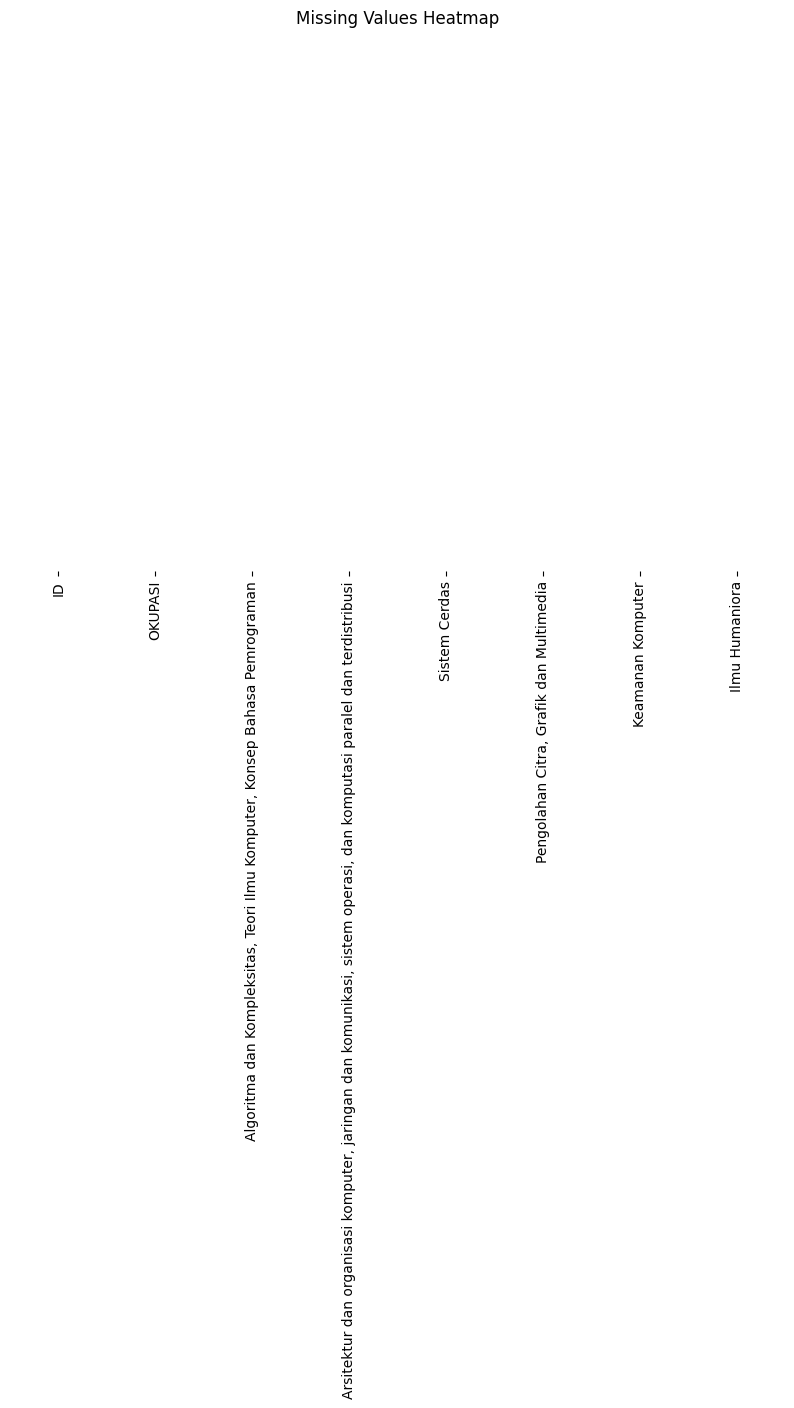

In [44]:
# Create a binary mask where 0 is True and non-zero is False
mask = merged_data_cleaned.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create the heatmap
sns.heatmap(mask, cmap='binary', cbar=False, yticklabels=False)

# Set the title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the style for Seaborn
# sns.set_style("whitegrid")

# # Create the plot
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=pivoted_grades_filled, x='ID', y='IPK', marker='o', color='b')

# # Customize the plot
# plt.title('Trend of Grades (IPK) by ID', fontsize=14)
# plt.xlabel('NPM (Student ID)', fontsize=12)
# plt.ylabel('IPK (Grade Point Average)', fontsize=12)
# plt.xticks(rotation=90)  # Rotate the NPM labels for better readability

# # Show the plot
# plt.tight_layout()
# plt.show()


In [46]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the style for Seaborn
# sns.set_style("whitegrid")

# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.histplot(data=pivoted_grades_filled, x='IPK', kde=True, color='skyblue', edgecolor='black')

# # Customize the plot
# plt.title('Distribution of Grades (IPK)', fontsize=14)
# plt.xlabel('IPK (Grade Point Average)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# # Show the plot
# plt.tight_layout()
# plt.show()


## Modelling with Random Forest, KNN, Logistic Regression, SVM, Naive Bayes, and CatBoost.

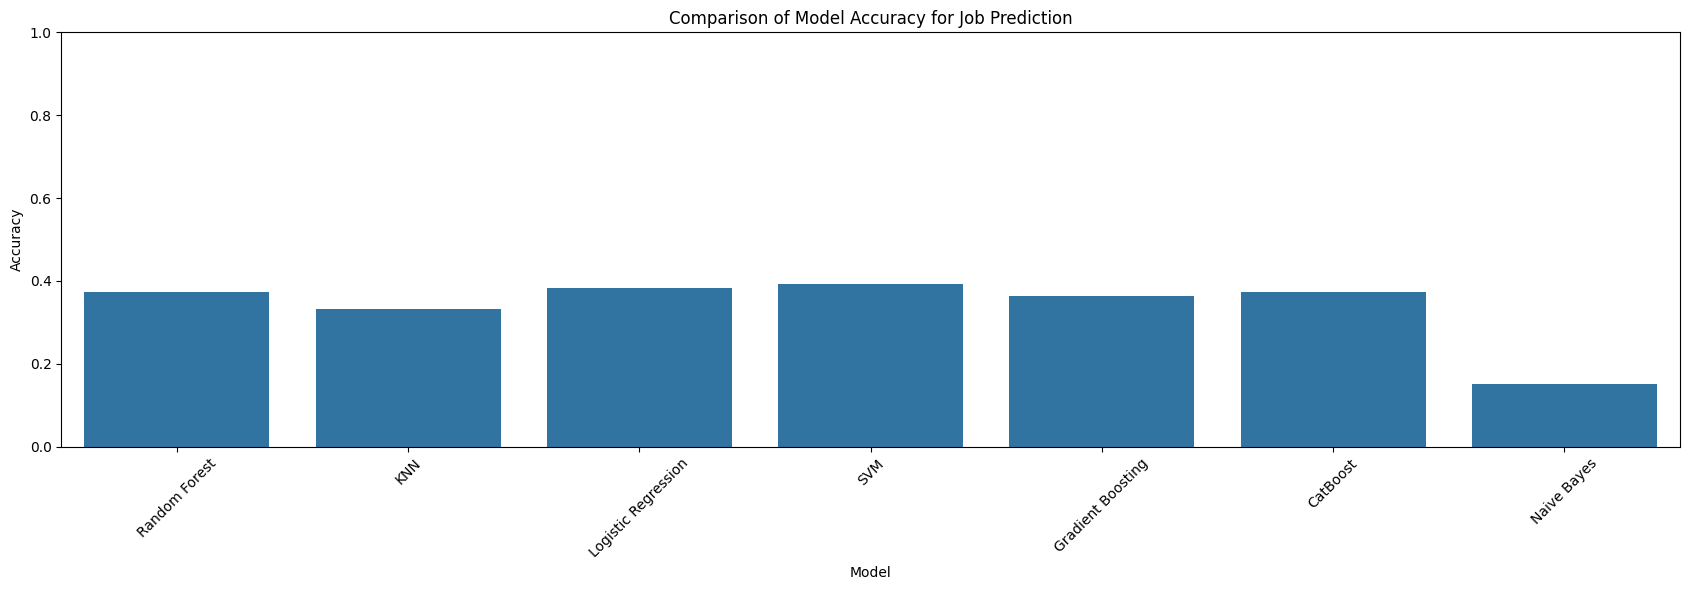

In [48]:
# Required imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pivoted_grades_filled is a DataFrame you have prepared already
# Encode the target variable 'Klasifikasi Profesi'
label_encoder = LabelEncoder()
merged_data_cleaned['Okupasi_encoded'] = label_encoder.fit_transform(merged_data_cleaned['OKUPASI'])

# Define feature set and target variable
X = merged_data_cleaned.drop(['ID', 'OKUPASI', 'Okupasi_encoded'], axis=1)
y = merged_data_cleaned['Okupasi_encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Naive Bayes": GaussianNB(),
}

# Train models and collect results
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Convert results to DataFrame for plotting
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Plot the results
plt.figure(figsize=(17, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Comparison of Model Accuracy for Job Prediction')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

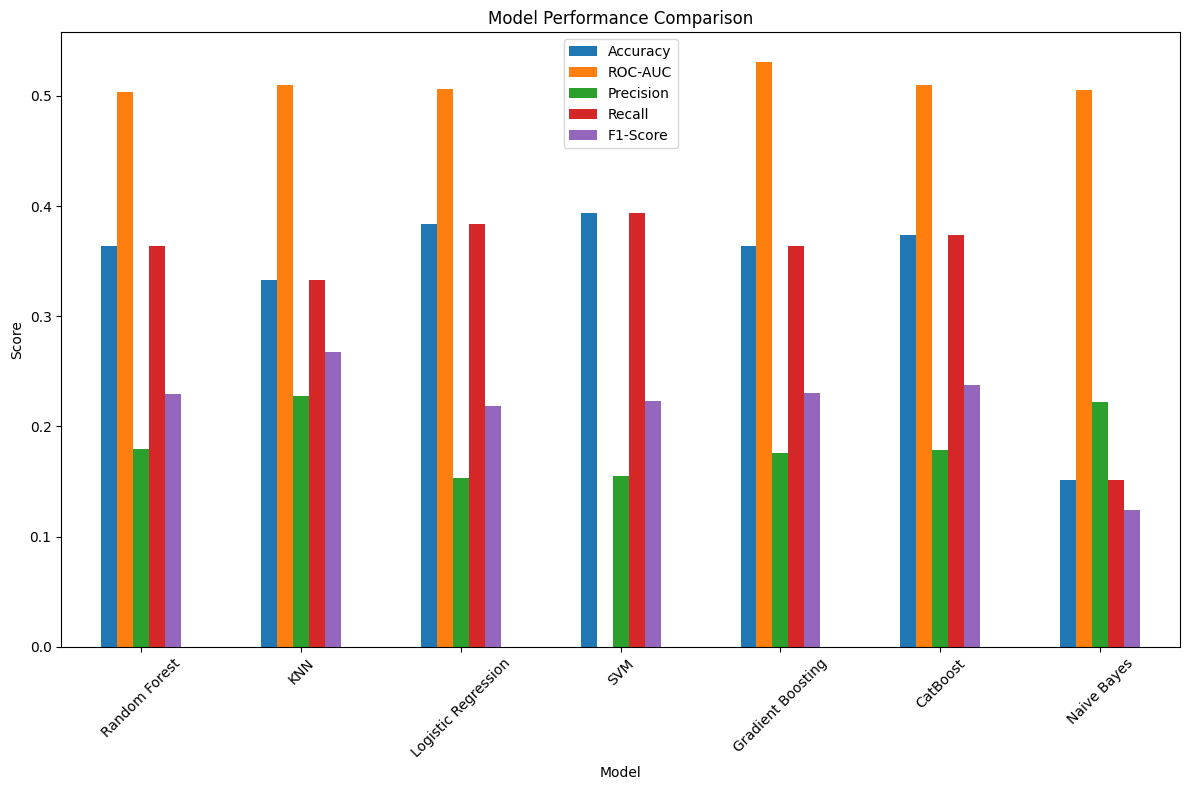

In [49]:
# Required imports
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Initialize lists to store results
model_performance = []

# Train models and collect results
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Only calculate ROC-AUC if the model supports `predict_proba`
    if hasattr(model, "predict_proba"):
        try:
            roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        except ValueError:
            roc_auc = np.nan  # Handle cases where the number of classes is mismatched
    else:
        roc_auc = np.nan  # Not all models provide predict_proba (e.g., SVM)

    # Classification report (precision, recall, F1-score)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Append to the performance list
    model_performance.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
    })

# Convert the results to DataFrame
performance_df = pd.DataFrame(model_performance)

# Plot the performance metrics
plt.figure(figsize=(12, 8))
performance_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


IndexError: index 6 is out of bounds for axis 0 with size 6

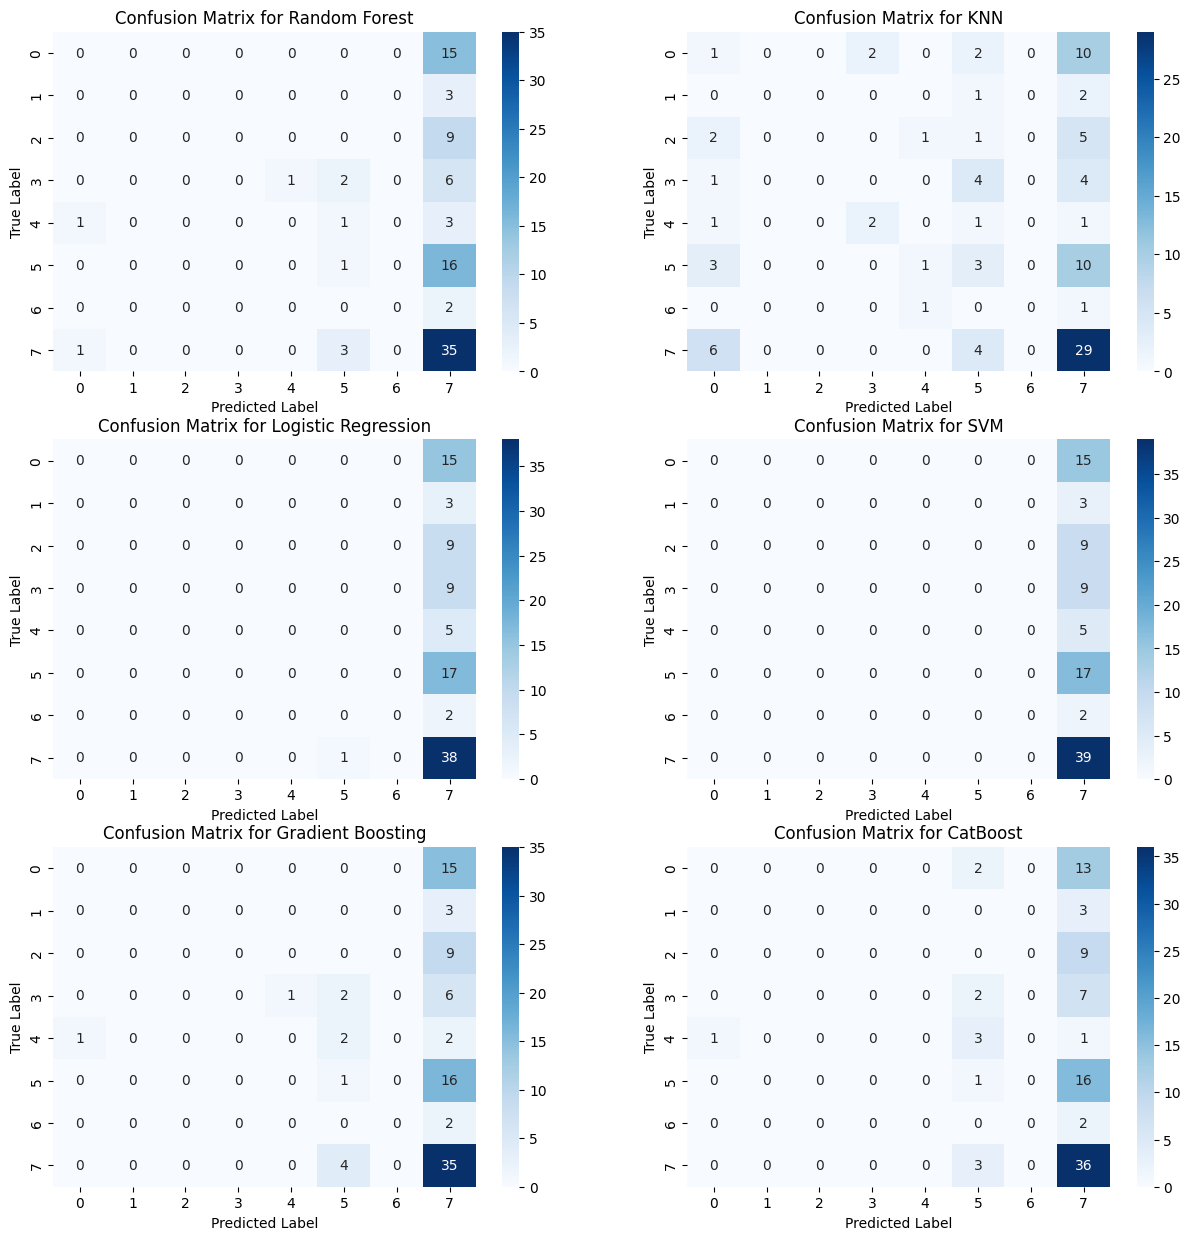

In [50]:
# Plot confusion matrix for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()
